In [1]:
%matplotlib inline

# Import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import scipy as sp
import itertools

from IPython.display import display
sns.set()

In [2]:
# Load the datasets
df_red = pd.read_csv("winequality-red.csv", sep=";")
df_white = pd.read_csv("winequality-white.csv", sep=";")

# Exploring the dataset

In [3]:
# Examine the first 5 and last 5 rows
print("Red Wine: ")
display(df_red.iloc[pd.np.r_[0:5, -5:0]])
print("White Wine: ")
display(df_white.iloc[pd.np.r_[0:5, -5:0]])

Red Wine: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


White Wine: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [4]:
# Check for nulls
print("Checks for nulls in datasets:")
print("In red wine dataset: %s" % df_red.isnull().values.any())
print("In white wine dataset: %s" % df_white.isnull().values.any())

print()
# Check for duplicates
print("Checks for duplicates in datasets:")
print("In red wine dataset: %s" % df_red.duplicated().values.any())
print("In white wine dataset: %s" % df_white.duplicated().values.any())

Checks for nulls in datasets:
In red wine dataset: False
In white wine dataset: False

Checks for duplicates in datasets:
In red wine dataset: True
In white wine dataset: True


In [5]:
# Clean up the duplicates
print("Length of dataset of red wine before: %s" % df_red.shape[0])
print("Length of dataset of red wine after: %s" % df_red.drop_duplicates().shape[0])
print()
print("Length of dataset of white wine before: %s" % df_white.shape[0])
print("Length of dataset of white wine after: %s" % df_white.drop_duplicates().shape[0])

Length of dataset of red wine before: 1599
Length of dataset of red wine after: 1359

Length of dataset of white wine before: 4898
Length of dataset of white wine after: 3961


In [6]:
# Remove the duplicates
df_red = df_red.drop_duplicates()
df_white = df_white.drop_duplicates()

# Join the two dataset
df_red['type_text'] = "Red Wine"
df_white['type_text'] = "White Wine"
df_red['type'] = 0
df_white['type'] = 1
df = df_red.append(df_white)

In [7]:
# Summarised information about the datasets
print("Red wine: ")
display(df_red.describe())
print("White wine: ")
display(df_white.describe())

Red wine: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.0
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252,0.0
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578,0.0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000,0.0
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,0.0


White wine: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.0
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835,1.0
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.0
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000,1.0
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000,1.0
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000,1.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.0


As seen from the two tables:
- The mean of the quality of white wine is slightly higher than red wine but the median for both types of wines are the same.
- White wine tends to have a higher concentration of sulfur dioxide and residual sugar.
- The level of alcohol in both types of wines are similar.
- The minimum quality score for both types of wines is 3.
- The maximum quality score for red wine is 8 while it's 9 for white wine.

In [8]:
"""
Split the wines into 3 different categories:
0 - 4 : Low quality
5 - 6 : Medium quality
7+    : High quality
"""
interval = (0, 4, 6, 10)
cats = ["Low Quality", "Medium Quality", "High Quality"]
df_red["quality_cat"] = pd.cut(df_red.quality, interval, labels=cats)
df_white["quality_cat"] = pd.cut(df_white.quality, interval, labels=cats)
df["quality_cat"] = pd.cut(df.quality, interval, labels=cats)

In [9]:
print("Percentage of wines in each category: ")
print("Red: ")
for i in ["Low Quality", "Medium Quality", "High Quality"]:
    print(i + ": " + str(round(df_red[df_red["quality_cat"] == i].shape[0] / df_red.shape[0] * 100, 2)))
print()
print("White: ")
for i in ["Low Quality", "Medium Quality", "High Quality"]:
    print(i + ": " + str(round(df_white[df_white["quality_cat"] == i].shape[0] / df_white.shape[0] * 100, 2)))

Percentage of wines in each category: 
Red: 
Low Quality: 4.64
Medium Quality: 81.82
High Quality: 13.54

White: 
Low Quality: 4.37
Medium Quality: 74.8
High Quality: 20.83


The majority of wines are within the medium quality category.

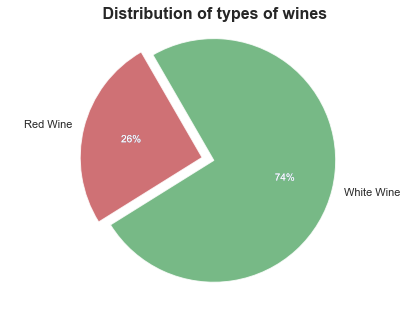

In [10]:
sns.set_style("white")
# Setting up information for pie chart
sizes = [df_red.shape[0], df_white.shape[0]]
labels = ['Red Wine', 'White Wine']
colors = ['r', 'g']
explode = (0.1, 0)

# Plotting
fig, ax = plt.subplots(figsize=(7, 5), subplot_kw=dict(aspect="equal"))
patches, texts, autotexts = ax.pie(sizes, labels=labels, explode=explode,
       autopct='%.f%%', 
       startangle=120, colors=colors, 
       wedgeprops={'alpha':0.8})

ax.axis('equal')
title = ax.set_title("   Distribution of types of wines", fontdict={'fontsize': 16})
title.set_weight("semibold")
for autotext in autotexts:
    autotext.set_color('w')
    autotext.set_path_effects([path_effects.Stroke(linewidth=0.2, foreground='b'), path_effects.Normal()])

plt.savefig("Distribution of types of wines")

Plotting the distributions of the quality of wines

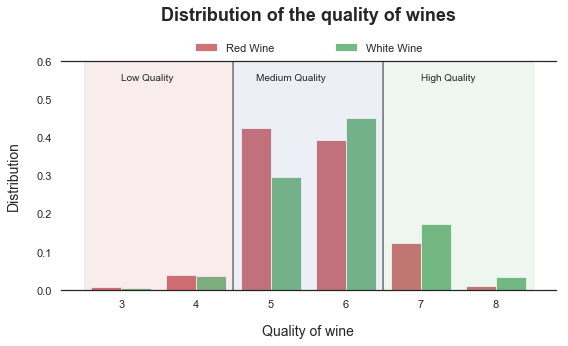

In [11]:
plt.figure(figsize=(8,5))
plt.hist([df_red['quality'], df_white['quality']], density=True, color=['r', 'g'], alpha=0.8,
        label=['Red Wine', 'White Wine'], align='left', bins=range(3, 10))

plt.ylim(0, 0.6)
plt.xlabel("Quality of wine", fontsize=14, labelpad=15)
plt.ylabel("Distribution", fontsize=14, labelpad=15)
sns.despine(left=True, top=False)
plt.legend(mode='expand', frameon=False, bbox_to_anchor=(0.25, 1.02, 0.5, .102), ncol=2)
plt.title("Distribution of the quality of wines", fontsize=18, y=1.15, fontweight='semibold')

# Plotting the areas of different qualities
plt.axvline(x=4.5, color='black', alpha=0.5)
plt.axvspan(2.5, 4.5, alpha=0.1, color='r')
plt.axvline(x=6.5, color='black', alpha=0.5)
plt.axvspan(4.5, 6.5, alpha=0.1, color='b')
plt.axvspan(6.5, 8.5, alpha=0.1, color='g')

# Annotating the areas
plt.annotate("Low Quality", (3, 0.55))
plt.annotate("Medium Quality", (4.8, 0.55))
plt.annotate("High Quality", (7, 0.55))

plt.tight_layout()
plt.savefig("Distribution of the quality of wines")

As seen from the plot:
- White wines tend to have higher quality than red wines. Most white wines have a quality of 6 while it's 5 for red wines.
- The distribution for the quality is very imbalanced. Most of the wines fall into a rating of between 5 - 6

C:\Users\BUI\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


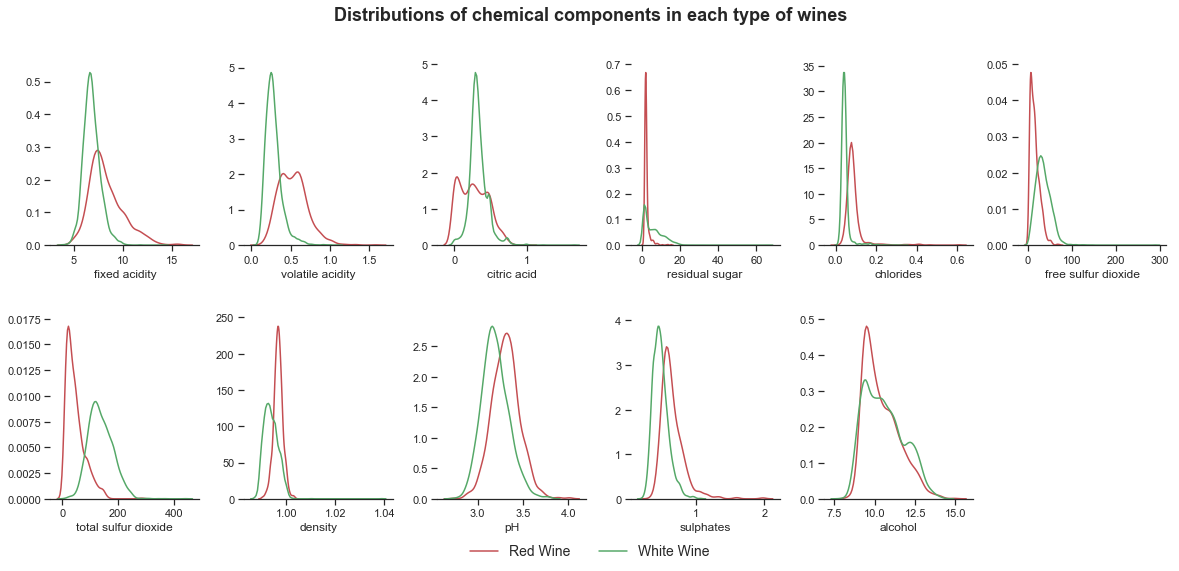

In [12]:
sns.set_style("ticks")
fig, ax = plt.subplots(2,6, figsize=(20,8))
ax=ax.flatten()

for i in range(11):
    p1 = sns.distplot(df_red.iloc[:, i], hist=False, kde=True, label="Red Wine", color="r", ax=ax[i])
    p2 = sns.distplot(df_white.iloc[:, i], hist=False, kde=True, label="White Wine", color="g", ax=ax[i])
    sns.despine(left=True, top=True)
    ax[i].legend_.remove()
    
plt.subplots_adjust(wspace=0.3, hspace=0.4)

fig.delaxes(ax[-1])
fig.legend([p1, p2], labels=['Red Wine', 'White Wine'], 
           loc='lower center', ncol=2, 
           prop={'size': 14}, frameon=False)

fig.suptitle("Distributions of chemical components in each type of wines", fontsize=18, fontweight='semibold')
plt.savefig("Distributions of chemical components in each type of wines ")

- Most of the distributions are left skewed and clustered around a single, sharp peak.
- There is a clear difference between the components of red and white wines. 


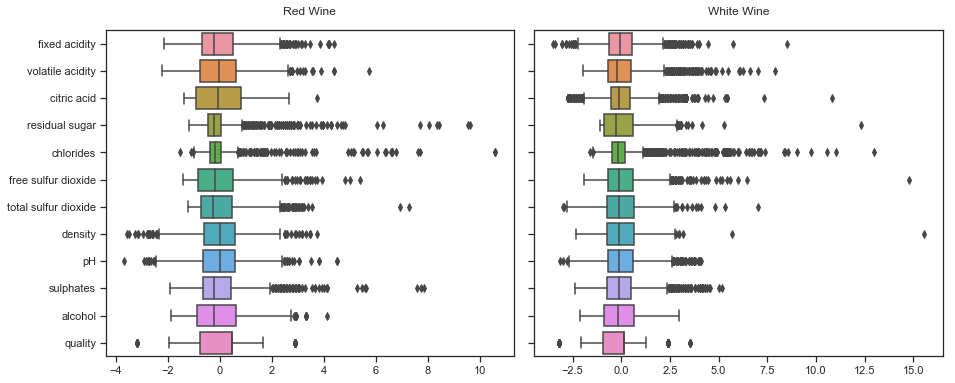

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15,6), sharey=True)
df_red_norm = (df_red.iloc[:, :-3] - df_red.iloc[:, :-3].mean())/df_red.iloc[:, :-3].std()
df_white_norm = (df_white.iloc[:, :-3] - df_white.iloc[:, :-3].mean())/df_white.iloc[:, :-3].std()

sns.boxplot(data=df_red_norm, orient='h', ax=ax[0])
ax[0].set_title("Red Wine", pad=15)

sns.boxplot(data=df_white_norm, orient='h', ax=ax[1])
ax[1].set_title("White Wine", pad=15)

plt.subplots_adjust(wspace =0.05)

In [42]:
print(sp.stats.ttest_ind(df_red['quality'], df_white['quality'], equal_var=False))

Ttest_indResult(statistic=-8.756837084597814, pvalue=3.6047291257042136e-18)


The t-test suggests that the mean for the two different type of wine is different on average.
<br>
An examination of the means show that white wines had a higher quality.

C:\Users\BUI\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


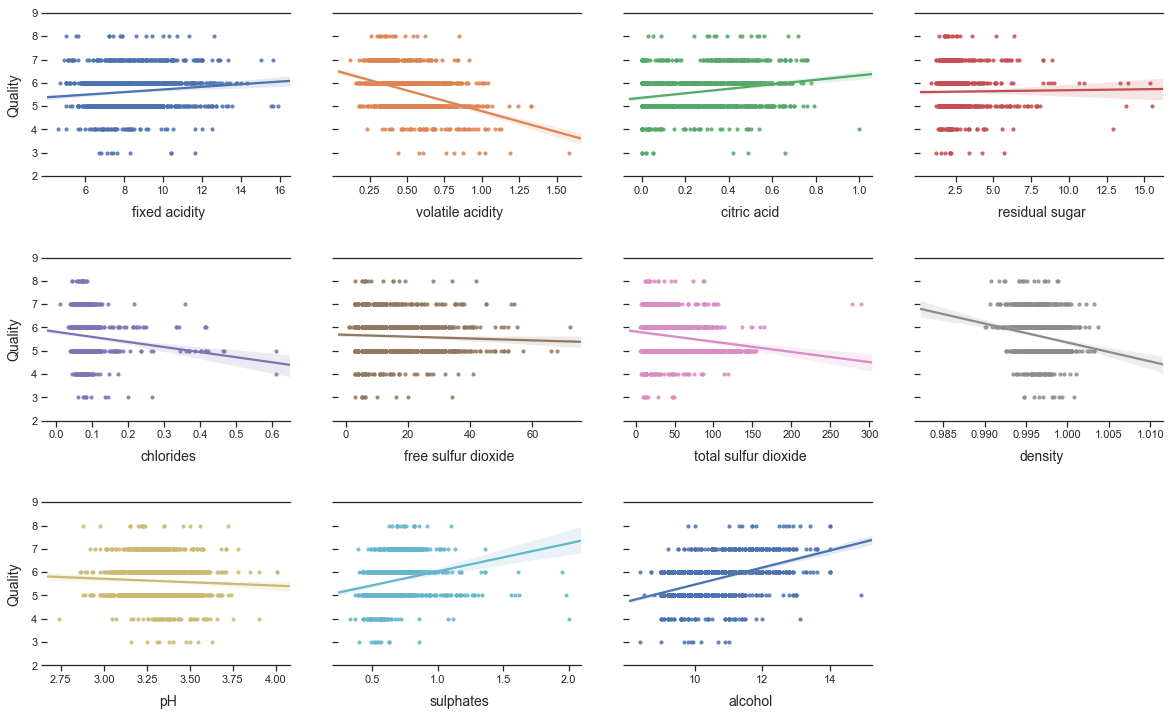

In [15]:
# Red Wine
x_vars = [col for col in df_red.columns[:-3]]
fig, ax = plt.subplots(3,4, figsize=(20,12), sharey=True)
ax = ax.flatten()

for i in range(len(x_vars)):
    sns.regplot(data=df_red, x=x_vars[i], y="quality", ax=ax[i],
                marker='o', scatter_kws={"s": 10})
    sns.despine(left=True, top=False)
    ax[i].set_xlabel(xlabel=x_vars[i], fontsize=14, labelpad=10)
    ax[i].set_ylim((2,9))
    if i % 4 == 0:
        ax[i].set_ylabel(ylabel="Quality", fontsize=14, labelpad=10)
    else:
        ax[i].set_ylabel(ylabel="")
    
plt.subplots_adjust(wspace =0.2, hspace=0.5)

# Delete the last plot
fig.delaxes(ax[-1])

It appears alcohol, sulphates, volatile acidity, density have the strongest relationship with quality. <br>
One important observation is that there is a presence of outliers in most of the features. <br>

C:\Users\BUI\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


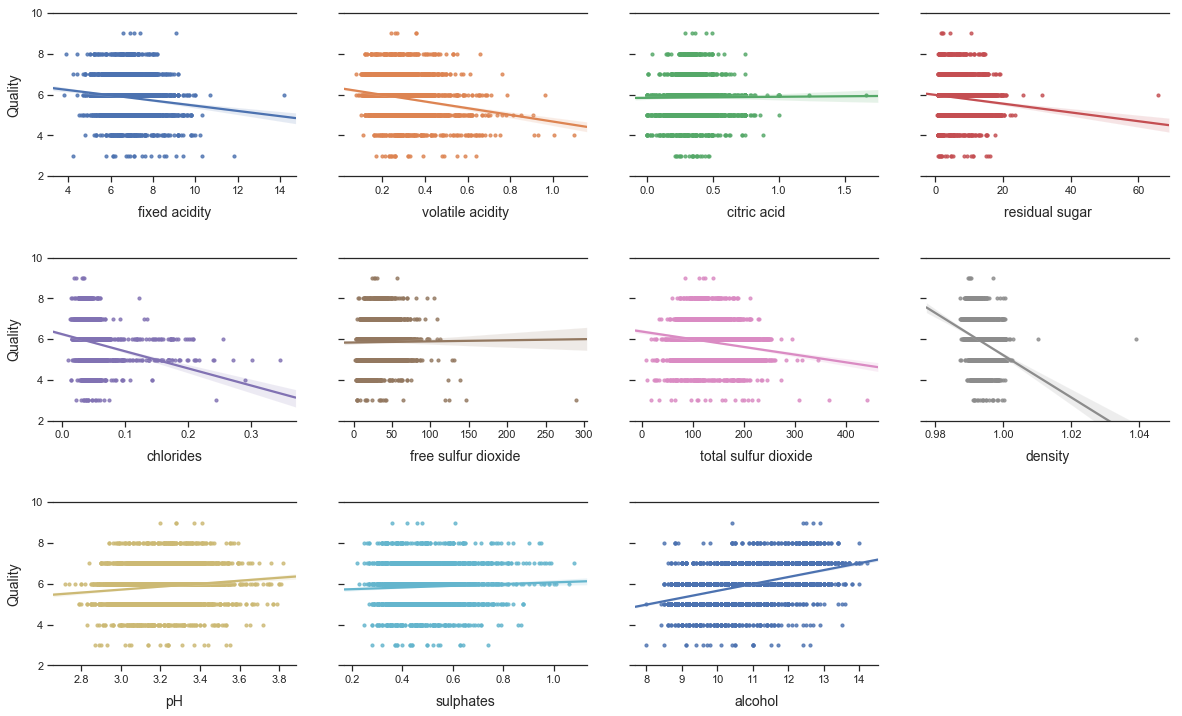

In [16]:
# White Wine
x_vars = [col for col in df_white.columns[:-3]]
fig, ax = plt.subplots(3,4, figsize=(20,12), sharey=True)
ax = ax.flatten()

for i in range(len(x_vars)):
    sns.regplot(data=df_white, x=x_vars[i], y="quality", ax=ax[i],
               marker='o', scatter_kws={"s": 10})
    sns.despine(left=True, top=False)
    ax[i].set_xlabel(xlabel=x_vars[i], fontsize=14, labelpad=10)
    ax[i].set_ylim((2,10))
    if i % 4 == 0:
        ax[i].set_ylabel(ylabel="Quality", fontsize=14, labelpad=10)
    else:
        ax[i].set_ylabel(ylabel="")
    
plt.subplots_adjust(wspace =0.2, hspace=0.5)

# Delete the last plot
fig.delaxes(ax[-1])

Unlike red wines, sulphates has a weak relationship with quality. This might be due to the lack of outliers in this dataset.

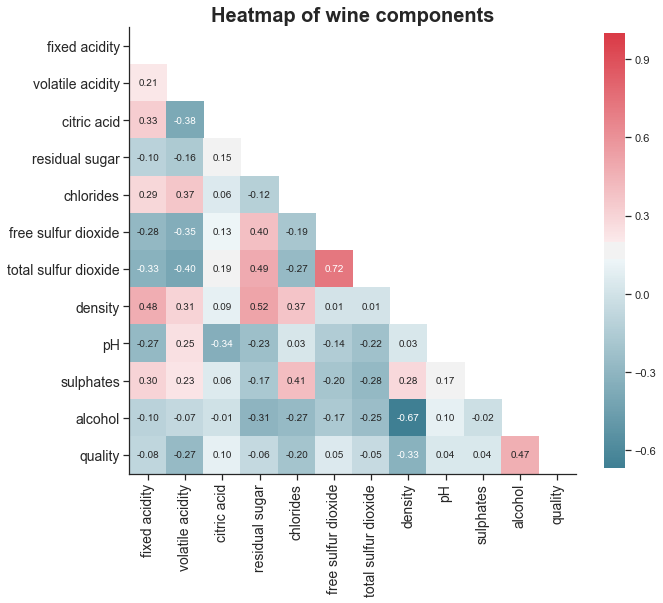

In [17]:
# Setup the plot
corr = df.drop(['quality_cat', 'type'], axis=1).corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
fig = sns.heatmap(corr, mask=mask, cmap=cmap, fmt=".2f", 
                  annot=True,square=True, cbar=True, 
                  cbar_kws={"shrink" : 0.8})
fig.set_title("Heatmap of wine components", fontsize=20, fontweight='semibold')
fig.tick_params(labelsize=14)
sns.despine(top=True)

plt.savefig("Heatmap of wine components")

Findings:
- Quality and level of alcohol have a moderate positive correlation.
- pH level negatively correlates with fixed acidity and citric acid but positively correlate with violate acidity.
- The 4 features: **alcohol**, **chlorides**, **volatile acidity**, **density** have the strongest effect on wine quality.

# Chemical speaking, what types of wines are there?
### Clustering

In [18]:
# More imports
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [19]:
# Encoding the label
features = ['alcohol', 'chlorides', 'volatile acidity', 'density']
y = pd.cut(df.quality, interval, labels=[0,1,2])
X = df.loc[:, features]

# Normalize the data
X_norm = (X - X.mean())/X.std()

Text(0.5,1,'Elbow Method For Optimal k')

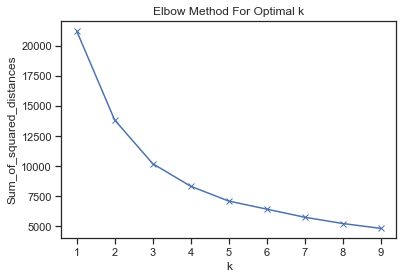

In [20]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k).fit(X_norm)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

Optimal number of clusters: 5.

In [21]:
# Performing k-means with 5 clusters
km = KMeans(n_clusters=5).fit(X_norm)
labels = km.predict(X_norm)
cent = km.cluster_centers_
kmeans = pd.DataFrame(labels)

X_norm.insert((X_norm.shape[1]), "kmeans", kmeans )

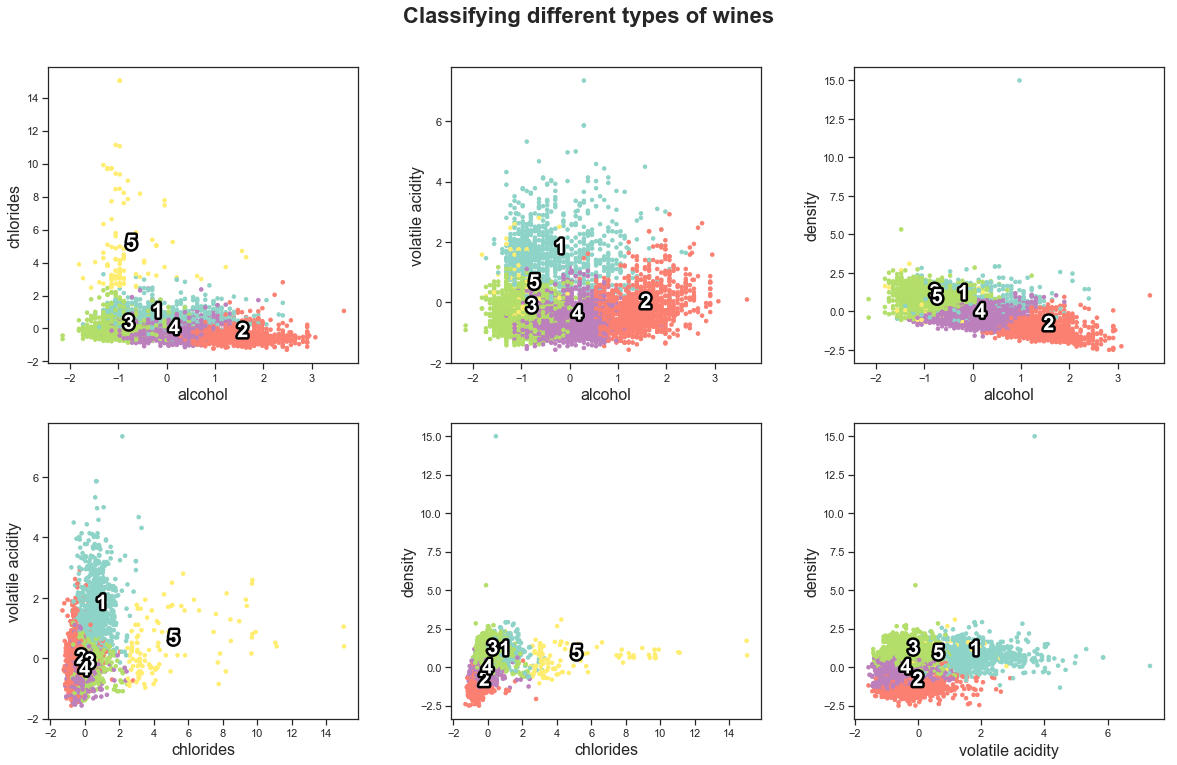

In [22]:
fig, ax = plt.subplots(2,3, figsize=(20,12))
ax = ax.flatten()
ax_index=0

for i in range(len(features)):
    for j in range(i + 1, len(features)):
        # Plot the cluster
        ax[ax_index].scatter(X_norm[features[i]], X_norm[features[j]], 
                             marker=".", c=kmeans[0], cmap='Set3', s=50)
        ax[ax_index].set_xlabel(features[i], fontsize=16)
        ax[ax_index].set_ylabel(features[j], fontsize=16)
        
        # Annotate the cluster
        for cluster in range(5):
            txt = ax[ax_index].annotate(xy=(cent[cluster, i], cent[cluster, j]),
                                  s=str(cluster+1), color='white',
                                  size=20, weight='bold')
            txt.set_path_effects([
                path_effects.Stroke(linewidth=5, foreground="black"),
                path_effects.Normal()])
        # ax[ax_index].scatter(cent[:, i], cent[:, j],c='white', edgecolors='black', s=200, alpha=0.8);
        ax_index+=1
        
plt.subplots_adjust(wspace =0.3, hspace=0.2)

fig.suptitle("Classifying different types of wines", fontsize=22, y=0.95, fontweight='semibold')
plt.savefig("Classifying different types of wines")

<table>
  <tr>
    <th><br>&nbsp;&nbsp; <br>&nbsp;&nbsp;</th>
    <th><br>&nbsp;&nbsp;Alcohol<br>&nbsp;&nbsp;</th>
    <th><br>&nbsp;&nbsp;Chlorides<br>&nbsp;&nbsp;</th>
    <th><br>&nbsp;&nbsp;Volatile Acidity<br>&nbsp;&nbsp;</th>
    <th><br>&nbsp;&nbsp;Density<br>&nbsp;&nbsp;</th>
  </tr>
  <tr>
    <td><br>&nbsp;&nbsp;Group 1<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;Medium<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;Low<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;Low<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;Low<br>&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td><br>&nbsp;&nbsp;Group 2<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;High<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;Low<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;Low<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;Low<br>&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td><br>&nbsp;&nbsp;Group 3<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;Medium<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;Medium<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;High<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;High<br>&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td><br>&nbsp;&nbsp;Group 4<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;Low<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;Medium<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;Low<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;High<br>&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td><br>&nbsp;&nbsp;Group 5<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;Low<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;High<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;Medium<br>&nbsp;&nbsp;</td>
    <td><br>&nbsp;&nbsp;High<br>&nbsp;&nbsp;</td>
  </tr>
</table>

# Prediction

### Predicting the type of wine

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [24]:
y = df.loc[:, 'type']
X = df.iloc[:, :-4]

# Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1411)

# A dict of all the models to train
models = {"Random Forest Classifier" : RandomForestClassifier(n_estimators=200, random_state=1411),
         "SVC" : SVC(kernel="linear", class_weight='balanced', random_state=1411),
         "Logistic Regression" : LogisticRegression(random_state=1411, solver='liblinear')}

In [25]:
# Checking for class imbalances
counts = y.value_counts()
display(counts)
print("There are %i more white wines compare to red wine" % (counts[1] - counts[0]))

1    3961
0    1359
Name: type, dtype: int64

There are 2602 more white wines compare to red wine


Let's see how the models perform on original dataset

In [26]:
def get_models_output(model_dict, X_train, y_train, X_test, y_test, ):
    for model_name, model in model_dict.items():
        model.fit(X_train, y_train)
        print("%s performance: " % model_name)
        y_pred = model.predict(X_test)
        print("Accuracy Score: %.2f" % (model.score(X_test, y_test)))
        print("Confusion matrix: ")
        print(confusion_matrix(y_test, y_pred))
        print("Classification report: ")
        print(classification_report(y_test, y_pred))
        print()

get_models_output(models, X_train, y_train, X_test, y_test)

Random Forest Classifier performance: 
Accuracy Score: 1.00
Confusion matrix: 
[[261   4]
 [  0 799]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       265
           1       1.00      1.00      1.00       799

   micro avg       1.00      1.00      1.00      1064
   macro avg       1.00      0.99      0.99      1064
weighted avg       1.00      1.00      1.00      1064


SVC performance: 
Accuracy Score: 0.99
Confusion matrix: 
[[260   5]
 [ 10 789]]
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       265
           1       0.99      0.99      0.99       799

   micro avg       0.99      0.99      0.99      1064
   macro avg       0.98      0.98      0.98      1064
weighted avg       0.99      0.99      0.99      1064


Logistic Regression performance: 
Accuracy Score: 0.99
Confusion matrix: 
[[256   9]
 [  6 793]]
Classification r

Models perform well even with unbalanced classes. Let's check which features are important.

In [27]:
# Return the most 5 important features using RFE
def get_features_importances(model_dict, X_train, y_train, X):
    for model_name, model in model_dict.items():
        print("%s :" % model_name)
        rfe = RFE(model, 5)
        fit = rfe.fit(X_train, y_train)
        selected_features = []
        for i in range(len(X.columns)):
            if fit.support_[i]:
                selected_features.append(X.columns[i])
        print("Selected Features: ")
        print(selected_features)
        print()
        
get_features_importances(models, X_train, y_train, X)

Random Forest Classifier :
Selected Features: 
['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates']

SVC :
Selected Features: 
['volatile acidity', 'citric acid', 'chlorides', 'pH', 'sulphates']

Logistic Regression :
Selected Features: 
['volatile acidity', 'chlorides', 'density', 'pH', 'sulphates']



In [28]:
def get_sampled_output(model_dict, X_train, y_train, X_test, y_test, method="over"):
    if method == 'over':
        sampler = RandomOverSampler(random_state=1411)
    elif method == 'under':
        sampler = RandomUnderSampler(random_state=1411)
    elif method == 'over-smote':
        sampler = SMOTE(random_state=1411)
    X_sampled, y_sampled = sampler.fit_sample(X_train, y_train)
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=1411)
    
    for model_name, model in models.items():
        print("%s :" % model_name)
        print("-" * 50)
        model.fit(X_train_s, y_train_s)
        y_pred = model.predict(X_test_s)
        print("On sampled testing dataset: ")
        print("Accuracy Score: %.2f" % (model.score(X_test_s, y_test_s)))
        print("Confusion matrix: ")
        print(confusion_matrix(y_test_s, y_pred))
        print("Classification report: ")
        print(classification_report(y_test_s, y_pred))
        print("-" * 50)
        y_pred = model.predict(X_test)
        print("On original testing dataset: ")
        print("Accuracy Score: %.2f" % (model.score(X_test, y_test)))
        print("Confusion matrix: ")
        print(confusion_matrix(y_test, y_pred))
        print("Classification report: ")
        print(classification_report(y_test, y_pred))
        print("-" * 50)
        print()

get_sampled_output(models, X_train, y_train, X_test, y_test)

Random Forest Classifier :
--------------------------------------------------
On sampled testing dataset: 
Accuracy Score: 1.00
Confusion matrix: 
[[625   0]
 [  2 638]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       625
           1       1.00      1.00      1.00       640

   micro avg       1.00      1.00      1.00      1265
   macro avg       1.00      1.00      1.00      1265
weighted avg       1.00      1.00      1.00      1265

--------------------------------------------------
On original testing dataset: 
Accuracy Score: 1.00
Confusion matrix: 
[[260   5]
 [  0 799]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       265
           1       0.99      1.00      1.00       799

   micro avg       1.00      1.00      1.00      1064
   macro avg       1.00      0.99      0.99      1064
weighted avg       1.00      1.00      

Our models show that they can accurately predict the type of wine even when the classes are unbalanced. <br>
Oversampling seems to improve models only slightly. <br>
This suggests the components of red wines are white wines are distinctly different.

### Predicting wine quality

In [29]:
y = df.loc[:, 'quality_cat']
X = df.iloc[:, :-4]

# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1411)

# Models to train
models = {"Random Forest Classifier" : RandomForestClassifier(n_estimators=200, 
                                                              class_weight='balanced',
                                                              random_state=1411),
         "SVC" : SVC(kernel="linear", class_weight='balanced', random_state=1411),
         "Logistic Regression" : LogisticRegression(random_state=1411, 
                                                    solver='newton-cg',
                                                    class_weight='balanced',
                                                   multi_class='multinomial'),
         "Decision Tree" : DecisionTreeClassifier(random_state=1411, class_weight='balanced')}

get_models_output(models, X_train, y_train, X_test, y_test)

Random Forest Classifier performance: 
Accuracy Score: 0.81
Confusion matrix: 
[[ 75   0 123]
 [  0   1  49]
 [ 33   1 782]]
Classification report: 
                precision    recall  f1-score   support

  High Quality       0.69      0.38      0.49       198
   Low Quality       0.50      0.02      0.04        50
Medium Quality       0.82      0.96      0.88       816

     micro avg       0.81      0.81      0.81      1064
     macro avg       0.67      0.45      0.47      1064
  weighted avg       0.78      0.81      0.77      1064


SVC performance: 
Accuracy Score: 0.50
Confusion matrix: 
[[150   9  39]
 [  6  29  15]
 [233 229 354]]
Classification report: 
                precision    recall  f1-score   support

  High Quality       0.39      0.76      0.51       198
   Low Quality       0.11      0.58      0.18        50
Medium Quality       0.87      0.43      0.58       816

     micro avg       0.50      0.50      0.50      1064
     macro avg       0.45      0.59      0.42

The problem of unbalanced classes are apparent here.

In [30]:
# Get the 5 most important features
get_features_importances(models, X_train, y_train, X)

Random Forest Classifier :
Selected Features: 
['volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol']

SVC :
Selected Features: 
['volatile acidity', 'chlorides', 'pH', 'sulphates', 'alcohol']

Logistic Regression :
Selected Features: 
['volatile acidity', 'chlorides', 'pH', 'sulphates', 'alcohol']

Decision Tree :
Selected Features: 
['volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']



In [31]:
# Oversampling 
get_sampled_output(models, X_train, y_train, X_test, y_test)

Random Forest Classifier :
--------------------------------------------------
On sampled testing dataset: 
Accuracy Score: 0.96
Confusion matrix: 
[[655   0   4]
 [  0 667   0]
 [ 64   6 560]]
Classification report: 
                precision    recall  f1-score   support

  High Quality       0.91      0.99      0.95       659
   Low Quality       0.99      1.00      1.00       667
Medium Quality       0.99      0.89      0.94       630

     micro avg       0.96      0.96      0.96      1956
     macro avg       0.96      0.96      0.96      1956
  weighted avg       0.96      0.96      0.96      1956

--------------------------------------------------
On original testing dataset: 
Accuracy Score: 0.79
Confusion matrix: 
[[115   0  83]
 [  0   7  43]
 [ 95   5 716]]
Classification report: 
                precision    recall  f1-score   support

  High Quality       0.55      0.58      0.56       198
   Low Quality       0.58      0.14      0.23        50
Medium Quality       0.85   

In [32]:
# Oversampling with SMOTE
get_sampled_output(models, X_train, y_train, X_test, y_test, method='over-smote')

Random Forest Classifier :
--------------------------------------------------
On sampled testing dataset: 
Accuracy Score: 0.90
Confusion matrix: 
[[611   0  48]
 [  5 648  14]
 [ 99  29 502]]
Classification report: 
                precision    recall  f1-score   support

  High Quality       0.85      0.93      0.89       659
   Low Quality       0.96      0.97      0.96       667
Medium Quality       0.89      0.80      0.84       630

     micro avg       0.90      0.90      0.90      1956
     macro avg       0.90      0.90      0.90      1956
  weighted avg       0.90      0.90      0.90      1956

--------------------------------------------------
On original testing dataset: 
Accuracy Score: 0.75
Confusion matrix: 
[[136   4  58]
 [  1  16  33]
 [131  40 645]]
Classification report: 
                precision    recall  f1-score   support

  High Quality       0.51      0.69      0.58       198
   Low Quality       0.27      0.32      0.29        50
Medium Quality       0.88   

Even with oversampling, the models can't overcome the unbalanced classes issue. <br>
Out of all the models, RF seems to be performing the best. <br>

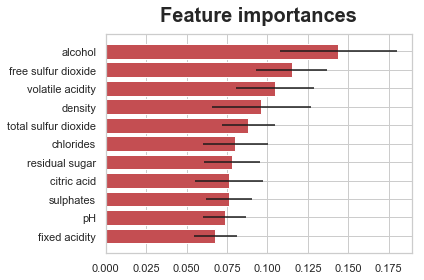

In [33]:
model = RandomForestClassifier(n_estimators=200, class_weight='balanced', 
                               oob_score=True, random_state=1411)
rf = model.fit(X_train, y_train)

importances = rf.feature_importances_
std = np.std([f.feature_importances_ for f in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::1]

sns.set_style('whitegrid')
plt.barh(X.columns[indices], importances[indices],
       color="r", xerr=std[indices], align="center")
plt.title("Feature importances", fontweight='semibold', fontsize=20, y=1.03)
plt.tight_layout()
plt.savefig("Feature importances")

The most informative feature is the level of alcohol.

C:\Users\BUI\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


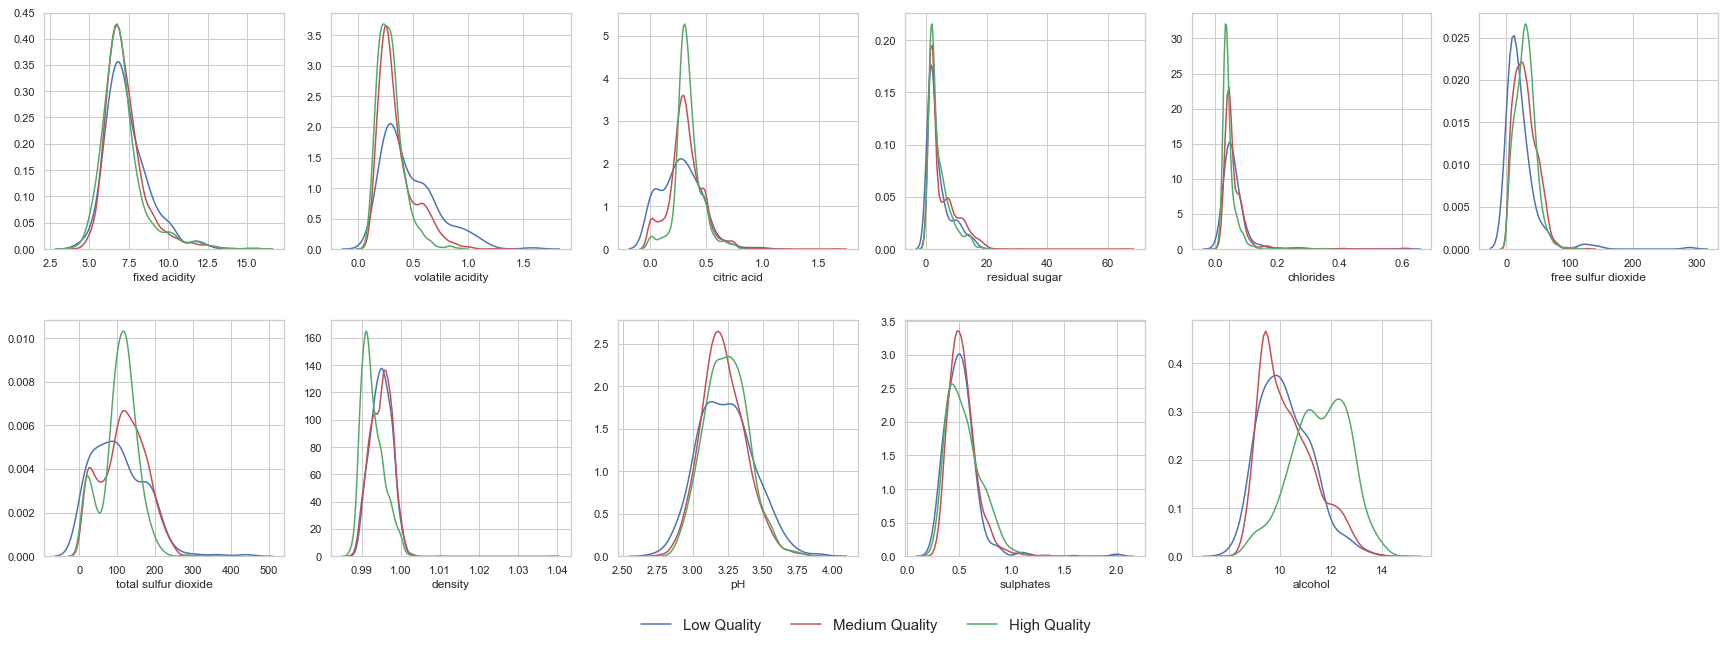

In [34]:
# Plotting the distributions of components for each quality of wines.
fig, ax = plt.subplots(2,6, figsize=(30,10))
ax = ax.flatten()

for i in range(len(X.columns)):
    p1 = sns.distplot(X[y == 'Low Quality'].iloc[:, i], ax=ax[i], hist=False, color='b', label='Low Quality')
    p2 = sns.distplot(X[y == 'Medium Quality'].iloc[:, i], ax=ax[i], hist=False, color='r', label='Medium Quality')
    p3 = sns.distplot(X[y == 'High Quality'].iloc[:, i], ax=ax[i], hist=False, color='g', label='High Quality')
    ax[i].legend_.remove()
    
fig.legend([p1, p2, p3],     
       labels=['Low Quality', 'Medium Quality', 'High Quality'],   
       loc="lower center",     
       ncol=3,
       prop={'size': 15}, frameon=False
       )
plt.subplots_adjust(wspace =0.2, hspace=0.3)
# Delete the last plot
fig.delaxes(ax[-1])

Most distributions are very similar within quality categories except a few such as alcohol, sulfur dioxide. <br>
Let's see the model performance on selected features.

In [35]:
selected_features = ['volatile acidity', 'free sulfur dioxide', 'density', 'alcohol']
X = df.loc[:, selected_features]
y = df.loc[:, 'quality_cat']

# Normalise the features
X = (X - X.mean()) / (X.max() - X.min())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1411)

In [36]:
rf = model.fit(X_train, y_train)
display(rf.score(X_test, y_test))
confusion_matrix(y_test, rf.predict(X_test))

0.7706766917293233

array([[ 60,   0, 138],
       [  0,   1,  49],
       [ 55,   2, 759]], dtype=int64)

In [37]:
# With sampling
sampler = RandomOverSampler(random_state=1411)
X_sampled, y_sampled = sampler.fit_sample(X_train, y_train)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=1411)

rf = model.fit(X_train_s, y_train_s)
display(rf.score(X_test, y_test))
confusion_matrix(y_test, rf.predict(X_test))

0.7490601503759399

array([[102,   1,  95],
       [  2,  11,  37],
       [117,  15, 684]], dtype=int64)

Better at predicting low and high quality but misclassify medium quality wines more.

In [38]:
# Let's see if combinations of different features would improve the model
for i,j in itertools.combinations(selected_features, 2):
    new_feature = i + " + " + j
    X[new_feature] = X[i] + X[j]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1411)
    
    print("Selected features: %s and %s" % (i, j))
    rf = model.fit(X_train, y_train)
    display(rf.score(X_test, y_test))
    
    print(confusion_matrix(y_test, rf.predict(X_test)))
    X = X.drop([new_feature], 1)
    print()

Selected features: volatile acidity and free sulfur dioxide


0.7706766917293233

[[ 60   0 138]
 [  0   2  48]
 [ 57   1 758]]

Selected features: volatile acidity and density


0.7734962406015038

[[ 58   0 140]
 [  0   4  46]
 [ 53   2 761]]

Selected features: volatile acidity and alcohol


0.7706766917293233

[[ 57   0 141]
 [  0   3  47]
 [ 52   4 760]]

Selected features: free sulfur dioxide and density


0.7725563909774437

[[ 61   0 137]
 [  0   3  47]
 [ 57   1 758]]

Selected features: free sulfur dioxide and alcohol


0.7725563909774437

[[ 56   0 142]
 [  0   4  46]
 [ 52   2 762]]

Selected features: density and alcohol


0.7857142857142857

[[ 69   0 129]
 [  0   2  48]
 [ 50   1 765]]



### Removing outliers

In [39]:
y = df.loc[:, 'quality_cat']
X = df.iloc[: , : -4]
y = y[(np.abs(sp.stats.zscore(X)) < 3).all(axis=1)]
X = X[(np.abs(sp.stats.zscore(X)) < 3).all(axis=1)]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1411)
rf = model.fit(X_train, y_train)
print("Score on test set: %.2f" % rf.score(X_test, y_test))
confusion_matrix(y_test, rf.predict(X_test))

Score on test set: 0.81


array([[ 61,   0, 122],
       [  0,   3,  34],
       [ 30,   0, 728]], dtype=int64)

Removing outliers doesn't seem to improve performance.